In [2]:
import pandas as pd

In [3]:
eps = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]
sizes = [10, 30, 50, 70]

In [12]:
d = pd.DataFrame()
for e in eps:
    for n in sizes:
        data = pd.read_csv(f"data/result_{n}_{e}.csv")
        data['eps'] = e
        data['sample_size'] = n
        d = d.append(data)

In [52]:
import numpy as np

In [144]:
n = 10
eps = 0.02

def plot_scatter_p_error(n, eps, id, ax):
    col = f"p_beta_{n}_{eps}"
    d['p'] = d[col]
    mn = d[[f'pns_{i}' for i in range(n)]].min(axis=1)
    mx = d[[f'pns_{i}' for i in range(n)]].max(axis=1)
    d['err'] = mx - d["pns_u_exact"]
    d[(d['p'] < 1.0)  & (d['index'] == id) & (d.sample_size == n) & (d.eps == eps)][['err', "p"]].plot.scatter("p", "err", ax = ax)

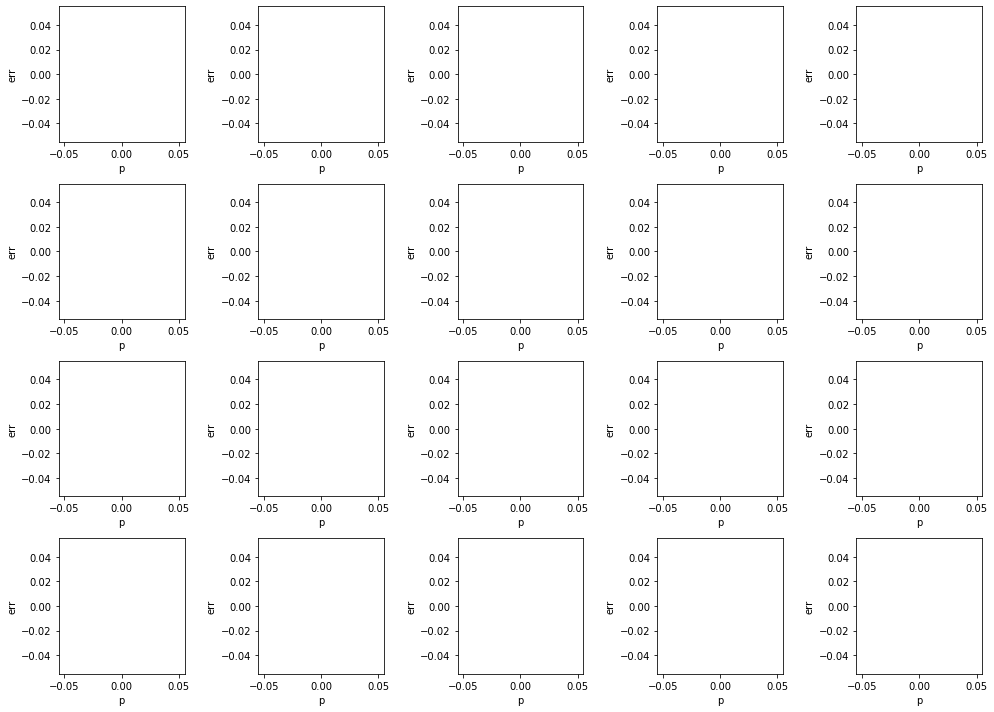

In [152]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(4,5, figsize=(14,10))
r = 0 
c = 0
for eps in [0.02,0.04,0.06, 0.08,0.1]:
    r = 0
    for n in [10,30,50,70]:
        plot_scatter_p_error(n,eps, 1, axs[r,c])
        r = r + 1
    c = c+1
plt.tight_layout()